In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
plt.style.use('dark_background')

In [2]:
df = gpd.read_file('eu4.geojson')

In [3]:
df.loc[:, 'id'] = df.id.astype(int)
df = df.set_index('id')

In [5]:
df.columns

Index(['skand_id', 'name', 'country', 'tag', 'religion', 'culture',
       'culture_group', 'terrain_type', 'terrain', 'continent', 'superregion',
       'region', 'area', 'dev', 'tax', 'prod', 'manp', 'tradenode',
       'trade_good', 'modifiers', 'geometry'],
      dtype='object')

In [249]:
df[df.superregion == 'Western Europe'].region.value_counts()

region
North Germany    81
France           66
South Germany    64
Iberia           62
Italy            57
Scandinavia      56
Britain          56
Low Countries    22
Name: count, dtype: int64

In [271]:
df.loc[200]

skand_id                                                   #1cf800
name                                                   Montpellier
country                                                     France
tag                                                            FRA
religion                                                  catholic
culture                                                    Occitan
culture_group                                               French
terrain_type                                             farmlands
terrain                                                       Land
continent                                                   Europe
superregion                                         Western Europe
region                                                      France
area                                                     Languedoc
dev                                                           16.0
tax                                                           

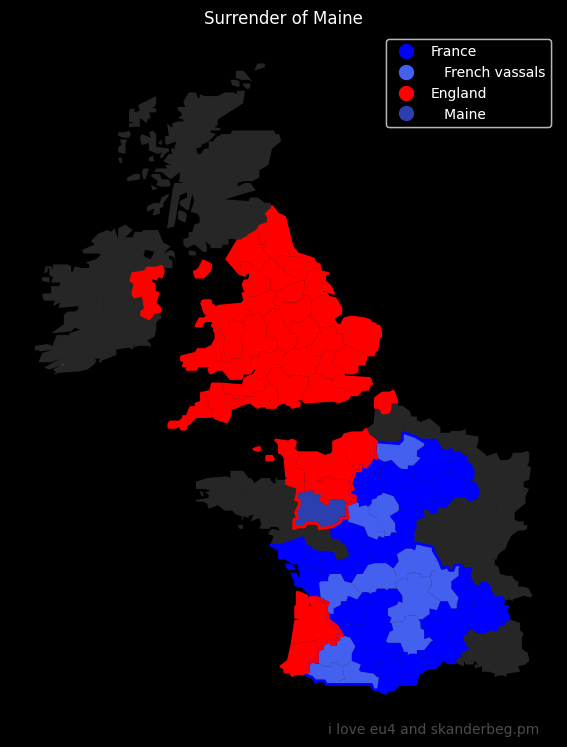

In [354]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_axis_off()

# background
ax = df[df.region.isin(['France', 'Britain'])].plot(color='grey', alpha=0.3, ax=ax, aspect=1)

df[df.tag == "FRA"].plot(ax=ax, aspect=1, color="blue")
gpd.GeoSeries(
    df[df.tag.isin(["FRA", "ORL", "FOI", "AMG", "AUV", 'BOU'])].unary_union
).boundary.plot(ax=ax, color="blue", linewidth=2)

df[df.tag.isin(["ORL", "FOI", "AMG", "AUV", 'BOU'])].plot(
    ax=ax, aspect=1, color='#4361EE'
)
# gpd.GeoSeries(
#     df[df.tag.isin(["FRA", "ORL", "FOI", "AMG", "AUV", "BOU"])].unary_union
# ).boundary.plot(ax=ax, color="white", linewidth=5, alpha=0.4) # pretty border


df[df.tag == "ENG"].plot(color="red", ax=ax, aspect=1)
gpd.GeoSeries(df[df.tag == 'ENG'].unary_union).boundary.plot(ax=ax, color='red', linewidth=2)
# gpd.GeoSeries(df[df.tag == 'ENG'].unary_union).boundary.plot(ax=ax, color='white', linewidth=5, alpha=0.4) # pretty border


df[df.name == "Maine"].plot(color='#2B3FAF', ax=ax, aspect=1)

# custom legend
from matplotlib.lines import Line2D
color_dict = {
    "France": "blue",
    "   French vassals": "#4361EE",
    "England": "red",
    "   Maine": "#2B3FAF",
}
custom_points = [
    Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color)
    for color in color_dict.values()
]
leg_points = ax.legend(custom_points, color_dict.keys())
ax.add_artist(leg_points)


fig.text(0.54, 0.1, 'i love eu4 and skanderbeg.pm', alpha=0.3)


# 0. background
# ax = df[(df.superregion == 'Western Europe')].plot(color='grey', alpha=0.3 ,ax=ax, aspect=1)

# 1. cool boundary
# df[df.tag == 'ENG'].plot(ax=ax, aspect=1, legend=True, color='red')
# gpd.GeoSeries(df[df.tag == 'ENG'].unary_union).boundary.plot(ax=ax)

# 2. centroid
# df[df.tag == 'KOR'].dissolve().centroid.plot(ax=ax)

plt.title('Surrender of Maine')
plt.show()